# Linear Regression


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [6]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

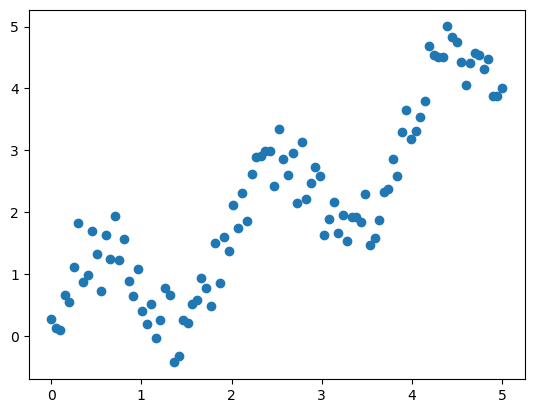

In [12]:
plt.scatter(x,y)

#### nonlinear

In [14]:
regr_lin = LinearRegression()

In [16]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [18]:
regr_lin.fit(X,y)

LinearRegression()

0.5790446152580317


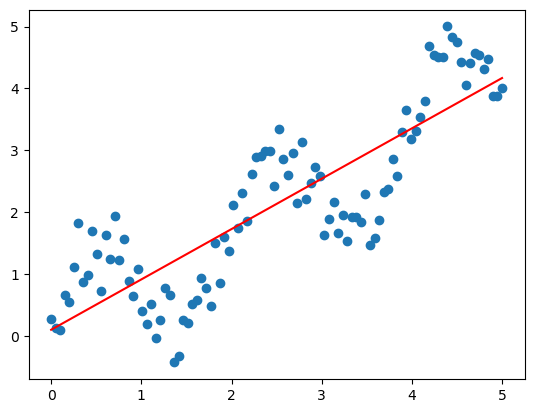

In [24]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [26]:
print(x.shape)

(100,)


In [40]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x]) 
# X_poly = np.array([[k, k**2, k**3, k**4, k**5, k**6] for k in x]) # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [42]:
regr_poly = LinearRegression()

In [44]:
regr_poly.fit(X_poly, y)

LinearRegression()

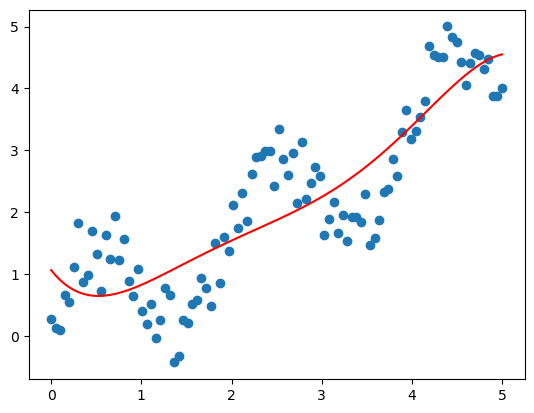

In [46]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [48]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-1.84998244  2.56665435 -1.18646427  0.25102055 -0.01920407]
interception:  1.066345837272813


In [52]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b  # .T轉置 因為現在是矩陣乘法

array([1.06634584, 0.97930808, 0.90446975, 0.84097161, 0.78799211,
       0.74474662, 0.71048669, 0.68449925, 0.66610592, 0.65466221,
       0.64955675, 0.65021057, 0.65607632, 0.66663751, 0.68140778,
       0.6999301 , 0.72177605, 0.74654505, 0.77386359, 0.80338449,
       0.83478615, 0.86777175, 0.90206856, 0.9374271 , 0.97362047,
       1.01044353, 1.04771216, 1.08526251, 1.12295025, 1.16064979,
       1.19825354, 1.23567113, 1.27282869, 1.30966807, 1.34614607,
       1.38223372, 1.41791548, 1.45318852, 1.48806193, 1.52255599,
       1.55670139, 1.59053851, 1.62411661, 1.65749311, 1.69073281,
       1.72390718, 1.75709353, 1.7903743 , 1.82383631, 1.85756998,
       1.89166856, 1.9262274 , 1.96134321, 1.99711325, 2.0336346 ,
       2.07100341, 2.10931413, 2.14865878, 2.18912613, 2.23080103,
       2.27376356, 2.31808835, 2.36384379, 2.41109126, 2.45988439,
       2.51026832, 2.56227889, 2.61594194, 2.67127252, 2.72827414,
       2.78693801, 2.84724231, 2.90915136, 2.97261497, 3.03756

In [54]:
regr_poly.predict(X_poly)

array([1.06634584, 0.97930808, 0.90446975, 0.84097161, 0.78799211,
       0.74474662, 0.71048669, 0.68449925, 0.66610592, 0.65466221,
       0.64955675, 0.65021057, 0.65607632, 0.66663751, 0.68140778,
       0.6999301 , 0.72177605, 0.74654505, 0.77386359, 0.80338449,
       0.83478615, 0.86777175, 0.90206856, 0.9374271 , 0.97362047,
       1.01044353, 1.04771216, 1.08526251, 1.12295025, 1.16064979,
       1.19825354, 1.23567113, 1.27282869, 1.30966807, 1.34614607,
       1.38223372, 1.41791548, 1.45318852, 1.48806193, 1.52255599,
       1.55670139, 1.59053851, 1.62411661, 1.65749311, 1.69073281,
       1.72390718, 1.75709353, 1.7903743 , 1.82383631, 1.85756998,
       1.89166856, 1.9262274 , 1.96134321, 1.99711325, 2.0336346 ,
       2.07100341, 2.10931413, 2.14865878, 2.18912613, 2.23080103,
       2.27376356, 2.31808835, 2.36384379, 2.41109126, 2.45988439,
       2.51026832, 2.56227889, 2.61594194, 2.67127252, 2.72827414,
       2.78693801, 2.84724231, 2.90915136, 2.97261497, 3.03756

In [58]:
Y=regr_poly.predict(X_poly)
mse = np.sum((Y-y)**2) / len(y)
print(mse)

0.4997385318483104


#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [68]:
# 用常態分佈的方式
# normal distrubution
def RBF(x, center, sigma):  # center 平均值  sigma 標準差
    k = np.exp(-(x - center)**2/(2*sigma**2))  # np.exp(x) = e**x
    return k

In [70]:
sigma = 0.3

In [78]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])   #center 是每個峰值的點
X_rbf


array([[2.49352209e-01, 3.72665317e-06, 8.32396968e-16, 2.77873902e-30,
        1.38634329e-49],
       [3.25472872e-01, 8.52574586e-06, 3.33776477e-15, 1.95292168e-29,
        1.70773187e-48],
       [4.12959721e-01, 1.89599467e-05, 1.30098499e-14, 1.33417628e-28,
        2.04484269e-47],
       [5.09321387e-01, 4.09857759e-05, 4.92924229e-14, 8.85998378e-28,
        2.38007940e-46],
       [6.10614979e-01, 8.61232743e-05, 1.81542941e-13, 5.71931425e-27,
        2.69286330e-45],
       [7.11597342e-01, 1.75913523e-04, 6.49934950e-13, 3.58877569e-26,
        2.96161426e-44],
       [8.06106646e-01, 3.49276399e-04, 2.26178717e-12, 2.18897091e-25,
        3.16616832e-43],
       [8.87650512e-01, 6.74109702e-04, 7.65111808e-12, 1.29785145e-24,
        3.29026462e-42],
       [9.50129573e-01, 1.26468753e-03, 2.51587693e-11, 7.47999499e-24,
        3.32367827e-41],
       [9.88587205e-01, 2.30636063e-03, 8.04165068e-11, 4.19052994e-23,
        3.26361145e-40],
       [9.99858301e-01, 4.0884

In [72]:
regr_rbf = LinearRegression()

In [74]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

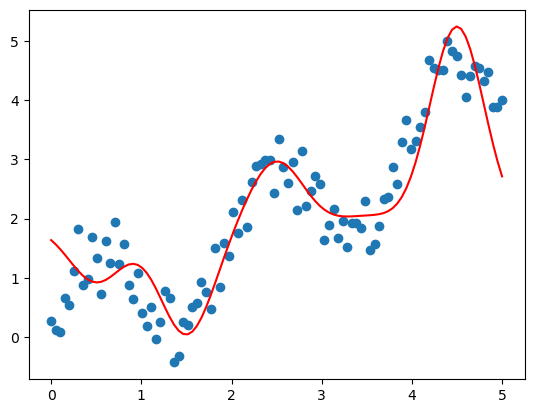

In [76]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [25]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-0.72620466 -1.83462409  1.09615001 -0.01194894  3.09093005]
interception:  1.877906975572715


#### Comparison

In [80]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

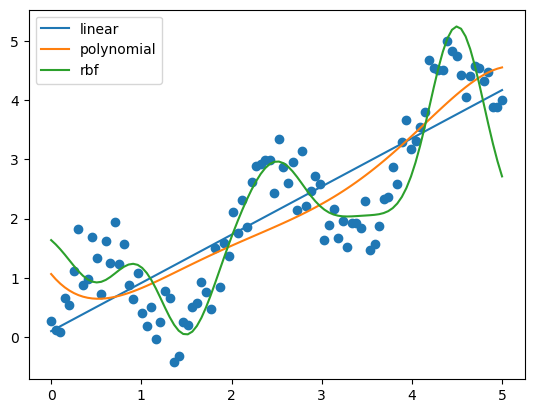

In [82]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [84]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.5790446152580317


In [86]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.4997385318483104


In [88]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.2868955167240902
